In [1]:
import nfl_data_py as nfl
import pandas as pd
# Define years list automatically
year = [2023]

In [160]:
import pandas as pd
from pathlib import Path

# ---------- STEP 1: Locate training data ----------
data_dir = Path("data")
train_path = next(data_dir.glob("*/train"), data_dir)
print(f"Using data folder: {train_path.resolve()}")

# ---------- STEP 2: Locate Week 1 CSVs ----------
week1_input_files = list(train_path.rglob("input_2023_w01.csv"))
week1_output_files = list(train_path.rglob("output_2023_w01.csv"))

print(f"Found {len(week1_input_files)} input files and {len(week1_output_files)} output files for Week 1.")

# ---------- STEP 3: Load Week 1 input and output ----------
week_1_input = pd.concat([pd.read_csv(f) for f in week1_input_files], ignore_index=True)
week_1_output = pd.concat([pd.read_csv(f) for f in week1_output_files], ignore_index=True)

print(f"Week 1 input shape: {week_1_input.shape}")
print(f"Week 1 output shape: {week_1_output.shape}")

# ---------- STEP 4: Merge Week 1 input and output ----------
week1_merge = week_1_input.merge(
    week_1_output,
    on=["game_id", "play_id", "nfl_id"],  # merge on appropriate keys
    how="inner"
)

print(f"Week 1 merged shape: {week1_merge.shape}")

# Preview
display(week1_merge.head())

Using data folder: /Users/woodsprocise/Documents/Sports Analytics Big Data/Phase 2/data/114239_nfl_competition_files_published_analytics_final/train
Found 1 input files and 1 output files for Week 1.
Week 1 input shape: (285714, 23)
Week 1 output shape: (32088, 6)
Week 1 merged shape: (941501, 26)


,game_id,play_id,player_to_predict,nfl_id,frame_id_x,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y,frame_id_y,x_y,y_y
0,2023090700,101,True,46137,1,right,42,Justin Reid,6-1,204,...,0.31,0.49,79.43,267.68,21,63.259998,-0.22,1,56.22,17.28
1,2023090700,101,True,46137,1,right,42,Justin Reid,6-1,204,...,0.31,0.49,79.43,267.68,21,63.259998,-0.22,2,56.63,16.88
2,2023090700,101,True,46137,1,right,42,Justin Reid,6-1,204,...,0.31,0.49,79.43,267.68,21,63.259998,-0.22,3,57.06,16.46
3,2023090700,101,True,46137,1,right,42,Justin Reid,6-1,204,...,0.31,0.49,79.43,267.68,21,63.259998,-0.22,4,57.48,16.02
4,2023090700,101,True,46137,1,right,42,Justin Reid,6-1,204,...,0.31,0.49,79.43,267.68,21,63.259998,-0.22,5,57.91,15.56


In [158]:
week_1_input, week_1_output

(           game_id  play_id  player_to_predict  nfl_id  frame_id  \
 0       2023090700      101              False   54527         1   
 1       2023090700      101              False   54527         2   
 2       2023090700      101              False   54527         3   
 3       2023090700      101              False   54527         4   
 4       2023090700      101              False   54527         5   
 ...            ...      ...                ...     ...       ...   
 285709  2023091100     3987               True   42489        29   
 285710  2023091100     3987               True   42489        30   
 285711  2023091100     3987               True   42489        31   
 285712  2023091100     3987               True   42489        32   
 285713  2023091100     3987               True   42489        33   
 
        play_direction  absolute_yardline_number   player_name player_height  \
 0               right                        42    Bryan Cook           6-1   
 1        

In [162]:
import pandas as pd

supplementary_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

print("✅ supplementary_data.csv loaded!")
print(supplementary_data.shape)
supplementary_data.head()

✅ supplementary_data.csv loaded!
(18009, 41)


/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/1592427359.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")


,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [6]:
import pandas as pd
from pathlib import Path

# Locate and load week 1 input/output data
data_dir = Path.cwd()

input_path = next(data_dir.rglob("input_2023_w01.csv"))
output_path = next(data_dir.rglob("output_2023_w01.csv"))
supp_path = next(data_dir.rglob("supplementary_data.csv"))

input_df = pd.read_csv(input_path)
output_df = pd.read_csv(output_path)
supp_df = pd.read_csv(supp_path)

print("✅ Data loaded successfully!")
print("Input:", input_df.shape, "Output:", output_df.shape, "Supplementary:", supp_df.shape)

✅ Data loaded successfully!
Input: (285714, 23) Output: (32088, 6) Supplementary: (18009, 41)


/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/2982316240.py:13: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supp_df = pd.read_csv(supp_path)


In [169]:
# Merge Week 1 input and output, then merge supplementary data
week1_merge = (
    input_df.merge(output_df, on=["game_id", "play_id"], how="inner")
            .merge(supp_df, on=["game_id", "play_id"], how="left")
)

print("Week 1 merged dataset shape:", week1_merge.shape)


Week 1 merged dataset shape: (11555551, 66)


In [170]:
# Calculate average yards allowed (lower = better defense)
defense_summary = (
    week1_merge.groupby(["defensive_team", "team_coverage_type"])
    .agg(avg_yards_gained=("yards_gained", "mean"),
         plays=("play_id", "count"))
    .reset_index()
)

/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/532797123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/532797123.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Defense Coverage")


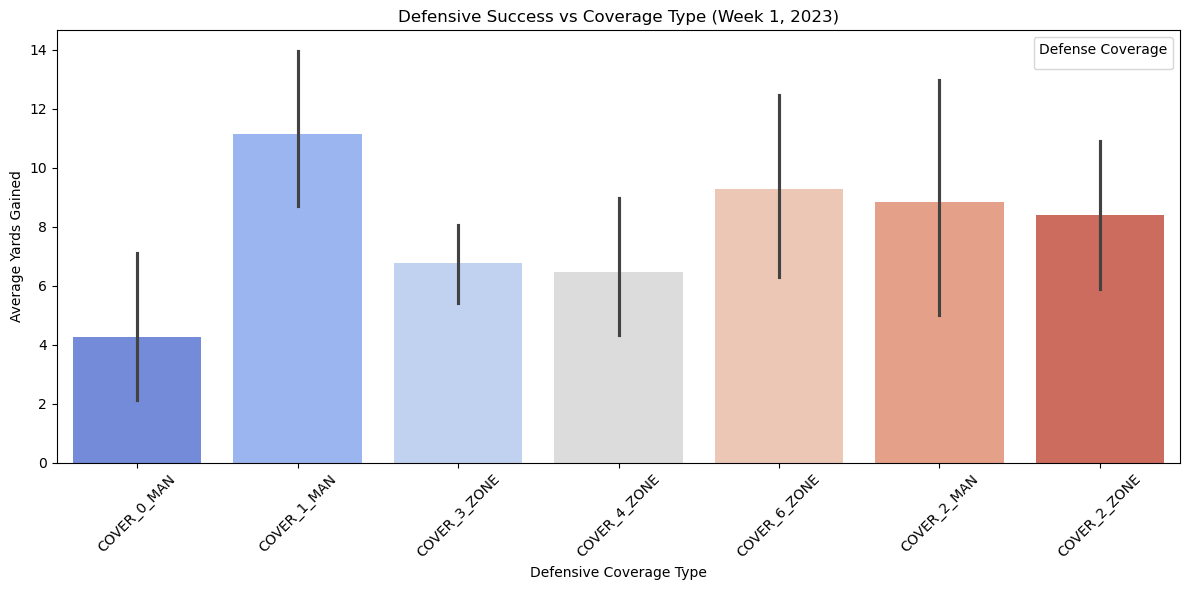

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
sns.barplot(
    data=defense_summary,
    x="team_coverage_type",
    y="avg_yards_gained",
    palette="coolwarm"
)

plt.title("Defensive Success vs Coverage Type (Week 1, 2023)")
plt.xlabel("Defensive Coverage Type")
plt.ylabel("Average Yards Gained")
plt.xticks(rotation=45)
plt.legend(title="Defense Coverage")
plt.tight_layout()
plt.show()

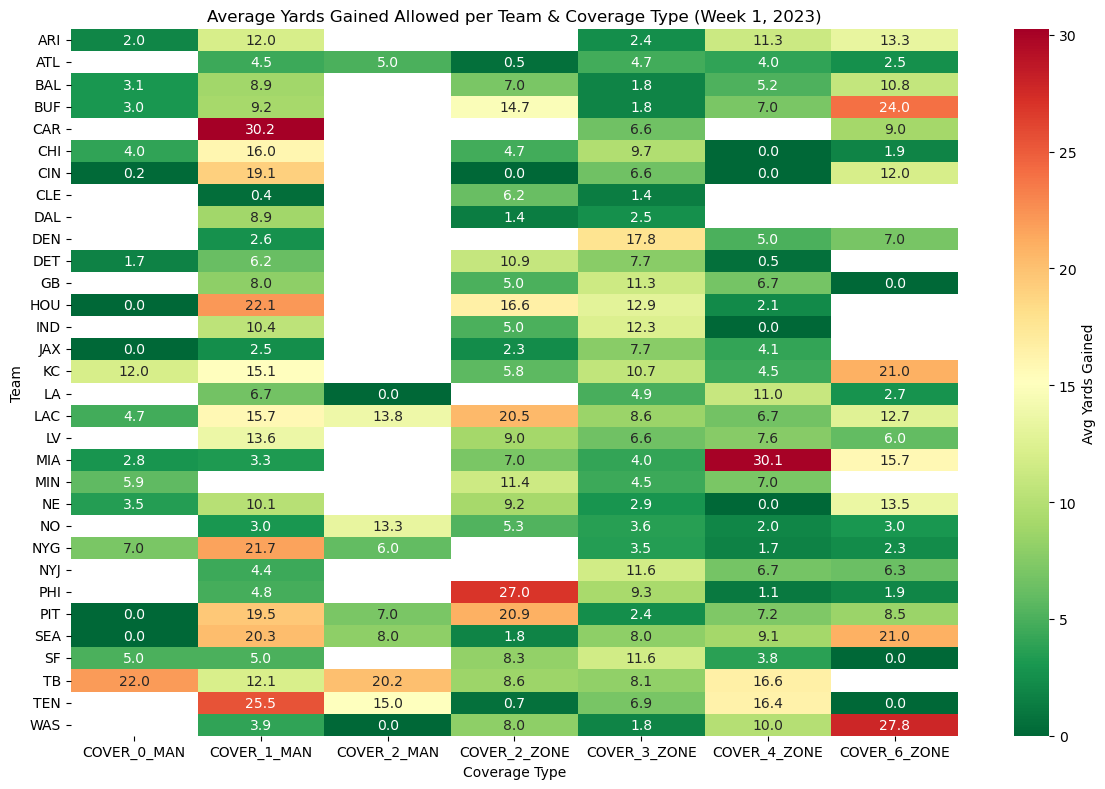

In [131]:
pivot = defense_summary.pivot(index="defensive_team", columns="team_coverage_type", values="avg_yards_gained")
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn_r", cbar_kws={"label": "Avg Yards Gained"})
plt.title("Average Yards Gained Allowed per Team & Coverage Type (Week 1, 2023)")
plt.xlabel("Coverage Type")
plt.ylabel("Team")
plt.show()

In [194]:
# If you have an 'expected_yards' column in your dataframe:
if 'expected_yards' in week1_merge.columns:
    week1_merge['defensive_success'] = week1_merge['yards_gained'] <= week1_merge['expected_yards']
else:
    # If you don't have expected_yards, define success as <= 5 yards allowed
    week1_merge['defensive_success'] = week1_merge['yards_gained'] <= 5

In [197]:
import pandas as pd
from pathlib import Path

# -------------------------------
# STEP 1: Locate Week 1 CSV files
# -------------------------------
data_dir = Path("data")
train_path = next(data_dir.glob("*/train"), data_dir)

# Locate Week 1 input and output files
input_files  = list(train_path.rglob("input_2023_w01.csv"))
output_files = list(train_path.rglob("output_2023_w01.csv"))

# -------------------------------
# STEP 2: Load CSVs
# -------------------------------
input_df  = pd.concat([pd.read_csv(f) for f in input_files], ignore_index=True)
output_df = pd.concat([pd.read_csv(f) for f in output_files], ignore_index=True)

# Load the supplementary data directly from its actual location
supp_path = Path("/Users/woodsprocise/Documents/Sports Analytics Big Data/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")
supp_df = pd.read_csv(supp_path)

print("Input shape:", input_df.shape)
print("Output shape:", output_df.shape)
print("Supplementary shape:", supp_df.shape)

# -------------------------------
# STEP 3: Merge input, output, and supplementary
# -------------------------------
week1_merge = (
    input_df.merge(output_df, on=["game_id", "play_id"], how="inner")
            .merge(supp_df, on=["game_id", "play_id"], how="left")
)

# -------------------------------
# STEP 4: Collapse to one row per play per defensive team
# -------------------------------
week1_plays = week1_merge.drop_duplicates(subset=["game_id", "play_id", "defensive_team"]).copy()

# -------------------------------
# STEP 5: Compute defensive success
# -------------------------------
# Define a play as successful if offense gained <= expected_yards (or <=5 if not available)
if "expected_yards" in week1_plays.columns:
    week1_plays["defensive_success"] = week1_plays["yards_gained"] <= week1_plays["expected_yards"]
else:
    week1_plays["defensive_success"] = week1_plays["yards_gained"] <= 5

# -------------------------------
# STEP 6: Summarize by defensive team
# -------------------------------
defense_summary = (
    week1_plays.groupby("defensive_team")
    .agg(
        avg_yards_allowed=("yards_gained", "mean"),
        success_rate=("defensive_success", "mean"),
        total_plays=("yards_gained", "count")  # now actual number of plays
    )
    .reset_index()
)

print("✅ Week 1 Defensive Summary:")
print(defense_summary)


/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/4241215618.py:22: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supp_df = pd.read_csv(supp_path)


Input shape: (285714, 23)
Output shape: (32088, 6)
Supplementary shape: (18009, 41)
✅ Week 1 Defensive Summary:
   defensive_team  avg_yards_allowed  success_rate  total_plays
0             ARI           8.695652      0.434783           23
1             ATL           4.814815      0.592593           27
2             BAL           6.781250      0.500000           32
3             BUF           7.538462      0.461538           13
4             CAR           9.400000      0.300000           10
5             CHI           7.695652      0.652174           23
6             CIN           6.347826      0.521739           23
7             CLE           2.956522      0.695652           23
8             DAL           5.500000      0.636364           22
9             DEN           9.043478      0.478261           23
10            DET           6.363636      0.606061           33
11             GB           6.827586      0.551724           29
12            HOU          10.153846      0.461538      

In [134]:
############ LOGO RESIZE


from PIL import Image

# Resize all logos to a consistent size (e.g., 100x100)
for path in logo_paths:
    img = Image.open(path)
    img = img.resize((250, 250))  # Resize to 100x100 pixels
    img.save(path)  # Overwrite with resized image

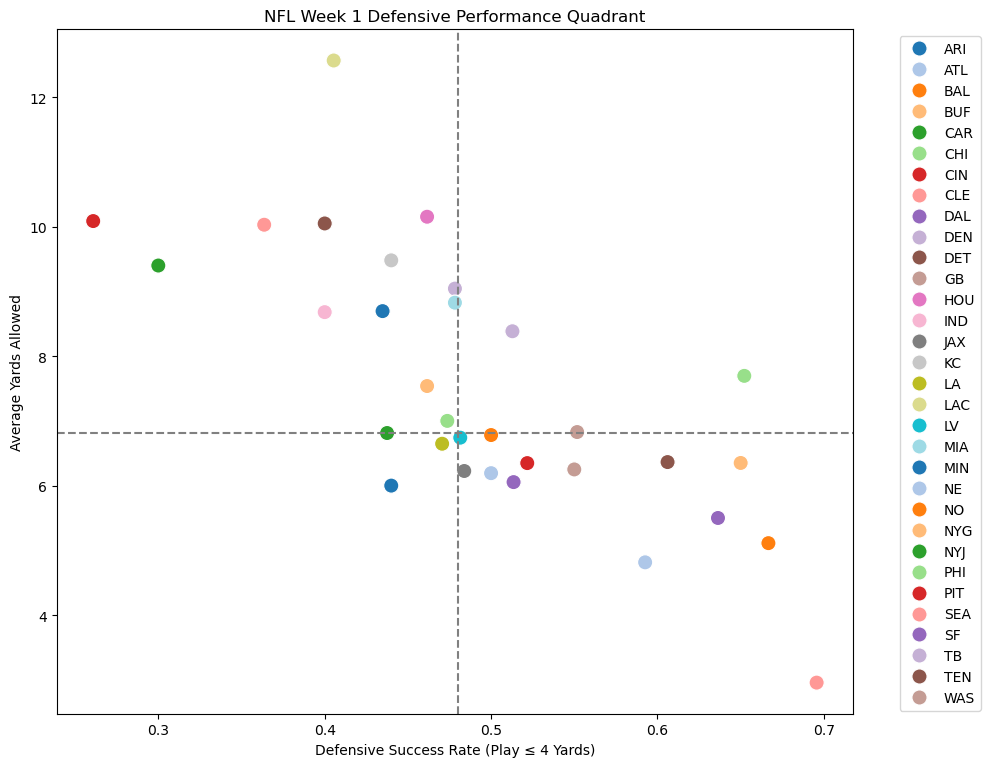

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=defense_summary,
    x="success_rate",
    y="avg_yards_allowed",
    hue="defensive_team",
    s=120,
    palette="tab20"
)

# Median lines for quadrants
x_median = defense_summary["success_rate"].median()
y_median = defense_summary["avg_yards_allowed"].median()

plt.axvline(x=x_median, color="gray", linestyle="--")
plt.axhline(y=y_median, color="gray", linestyle="--")

plt.title("NFL Week 1 Defensive Performance Quadrant")
plt.xlabel("Defensive Success Rate (Play ≤ 4 Yards)")
plt.ylabel("Average Yards Allowed")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [213]:
import pandas as pd

# Assume your merged DataFrame is named merged_week1
# Must include: def_team, yards_gained, down

# Define expected yards based on down
week1_plays["expected_yards"] = week1_plays["down"].map({
    1: 4,
    2: 3,
    3: 2,
    4: 1
})

# Define success: defense successful if yards gained <= expected yards
week1_plays["def_success"] = week1_plays["yards_gained"] <= week1_plays["expected_yards"]


In [214]:
defense_summary = (
    week1_plays.groupby("defensive_team")
    .agg(
        avg_yards_allowed=("yards_gained", "mean"),
        success_rate=("defensive_success", "mean"),
        total_plays=("yards_gained", "count")  # now actual number of plays
    )
    .reset_index()
)

In [216]:
# Summarize by team
defense_summary = (
    week1_plays.groupby("defensive_team")
    .agg(
        avg_yards_allowed=("yards_gained", "mean"),
        success_rate=("defensive_success", "mean"),
        total_plays=("yards_gained", "count")
    )
    .reset_index()
)

print(defense_summary.head())

  defensive_team  avg_yards_allowed  success_rate  total_plays
0            ARI           8.695652      0.434783           23
1            ATL           4.814815      0.592593           27
2            BAL           6.781250      0.500000           32
3            BUF           7.538462      0.461538           13
4            CAR           9.400000      0.300000           10


/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/1605877911.py:33: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_85445/1605877911.py:33: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/nfl-pbp/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/nfl-pbp/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


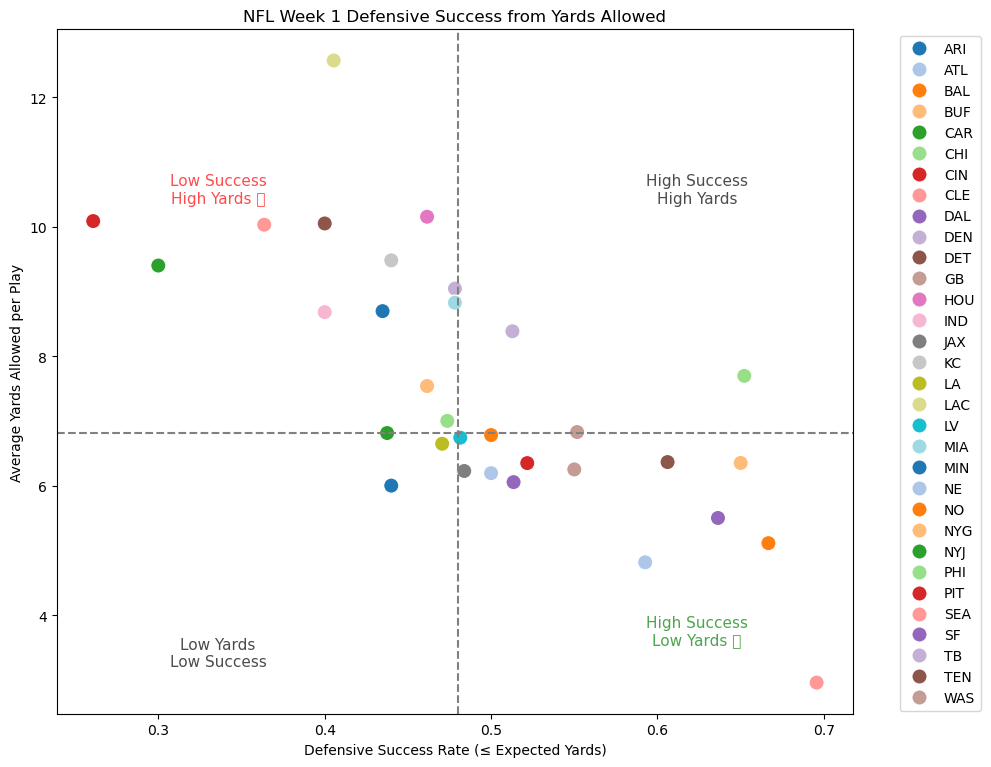

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=defense_summary,
    x="success_rate",
    y="avg_yards_allowed",
    hue="defensive_team",
    s=120,
    palette="tab20"
)

# Median lines for quadrants
x_median = defense_summary["success_rate"].median()
y_median = defense_summary["avg_yards_allowed"].median()

plt.axvline(x=x_median, color="gray", linestyle="--")
plt.axhline(y=y_median, color="gray", linestyle="--")

# Annotate quadrants
plt.text(x_median*0.7, y_median*0.5, "Low Yards\nLow Success", ha="center", va="center", fontsize=11, alpha=0.7)
plt.text(x_median*1.3, y_median*0.55, "High Success\nLow Yards ✅", ha="center", va="center", fontsize=11, color="green", alpha=0.7)
plt.text(x_median*0.7, y_median*1.55, "Low Success\nHigh Yards ❌", ha="center", va="center", fontsize=11, color="red", alpha=0.7)
plt.text(x_median*1.3, y_median*1.55, "High Success\nHigh Yards", ha="center", va="center", fontsize=11, alpha=0.7)

# Format
plt.title("NFL Week 1 Defensive Success from Yards Allowed")
plt.xlabel("Defensive Success Rate (≤ Expected Yards)")
plt.ylabel("Average Yards Allowed per Play")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

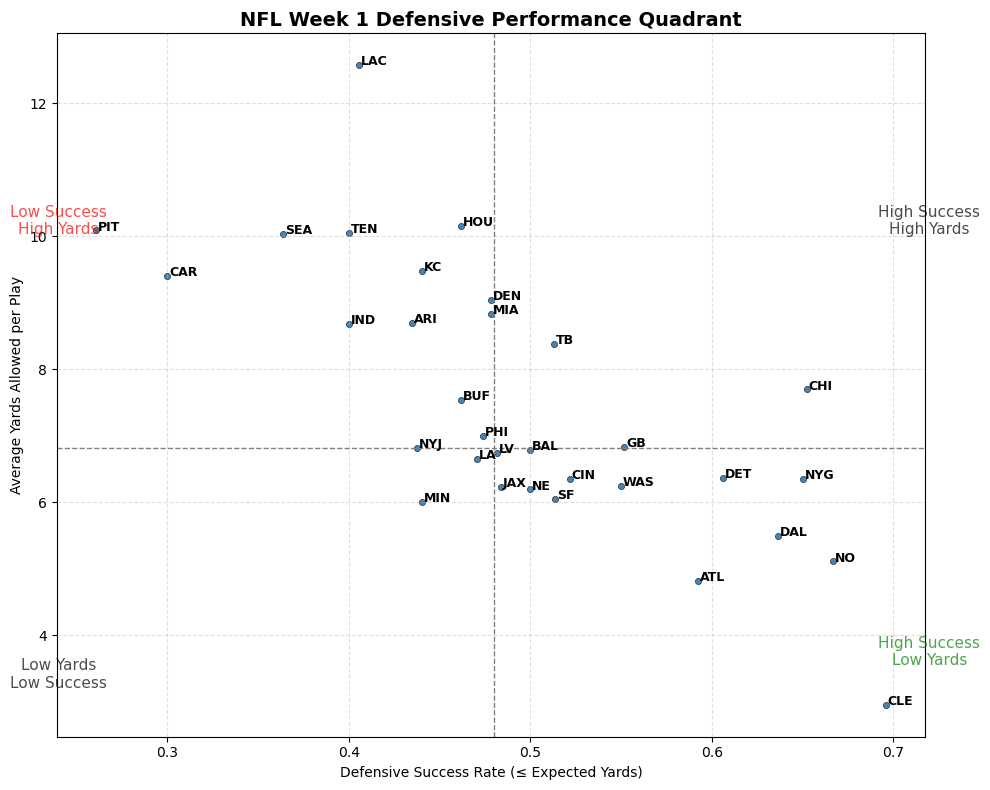

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

# Scatter plot of each team's performance
sns.scatterplot(
    data=defense_summary,
    x="success_rate",
    y="avg_yards_allowed",
    s=20,
    color="steelblue",
    edgecolor="black"
)

# Draw quadrant lines based on median values
x_median = defense_summary["success_rate"].median()
y_median = defense_summary["avg_yards_allowed"].median()

plt.axvline(x=x_median, color="gray", linestyle="--", lw=1)
plt.axhline(y=y_median, color="gray", linestyle="--", lw=1)

# Annotate each team directly on the chart
for _, row in defense_summary.iterrows():
    plt.text(
        row["success_rate"] + 0.001,   # slight x-offset
        row["avg_yards_allowed"] + 0.05,  # slight y-offset
        row["defensive_team"],               # team label
        fontsize=9,
        weight="bold",
        color="black",
        ha="left",
        va="center"
    )

# Annotate quadrants
plt.text(x_median*0.5, y_median*0.5, "Low Yards\nLow Success", ha="center", va="center", fontsize=11, alpha=0.7)
plt.text(x_median*1.5, y_median*0.55, "High Success\nLow Yards", ha="center", va="center", fontsize=11, color="green", alpha=0.7)
plt.text(x_median*0.5, y_median*1.5, "Low Success\nHigh Yards", ha="center", va="center", fontsize=11, color="red", alpha=0.7)
plt.text(x_median*1.5, y_median*1.5, "High Success\nHigh Yards", ha="center", va="center", fontsize=11, alpha=0.7)

# Format and labels
plt.title("NFL Week 1 Defensive Performance Quadrant", fontsize=14, weight="bold")
plt.xlabel("Defensive Success Rate (≤ Expected Yards)")
plt.ylabel("Average Yards Allowed per Play")

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# Define success as yards gained ≤ expected yards (or simply ≤ 5 if no expected_yards column)
merged["successful"] = merged["yards_gained"] <= merged["expected_yards"]

# Now group by defense team and coverage type
defense_summary = (
    merged.groupby(["defensive_team", "team_coverage_type"])
    .agg(
        avg_yards_allowed=("yards_gained", "mean"),
        success_rate=("successful", "mean"),
        plays=("play_id", "count")
    )
    .reset_index()
)

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# 🎯 Scatter plot where each point is a team+coverage combination
sns.scatterplot(
    data=defense_summary,
    x="success_rate",
    y="avg_yards_allowed",
    hue="team_coverage_type",
    style="team_coverage_type",
    s=120,
    edgecolor="black",
    alpha=0.9
)

# 🧭 Draw median reference lines
x_median = defense_summary["success_rate"].median()
y_median = defense_summary["avg_yards_allowed"].median()

plt.axvline(x=x_median, color="gray", linestyle="--", lw=1)
plt.axhline(y=y_median, color="gray", linestyle="--", lw=1)

# ✍️ Annotate team names next to each point
texts = []
for _, row in defense_summary.iterrows():
    texts.append(plt.text(
        row["success_rate"], 
        row["avg_yards_allowed"], 
        row["defensive_team"], 
        fontsize=8, 
        weight="bold", 
        color="black"
    ))


# 💡 Quadrant annotations
plt.text(x_median*0.95, y_median*0.9, "High Success\nLow Yards ✅", ha="right", va="bottom", color="green", fontsize=11)
plt.text(x_median*0.95, y_median*1.1, "Low Success\nLow Yards", ha="right", va="top", color="gray", fontsize=11)
plt.text(x_median*1.05, y_median*1.1, "Low Success\nHigh Yards ❌", ha="left", va="top", color="red", fontsize=11)
plt.text(x_median*1.05, y_median*0.9, "High Success\nHigh Yards", ha="left", va="bottom", color="orange", fontsize=11)

# 🧩 Titles & aesthetics
plt.title("NFL Week 1 Defensive Success by Coverage Type", fontsize=14, weight="bold")
plt.xlabel("Defensive Success Rate (≤ Expected Yards)")
plt.ylabel("Average Yards Allowed per Play")
plt.legend(title="Coverage Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `team_coverage_type` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>